# Benchmark Results
This notebook visualizes the output from the different models on different classification problems

In [25]:
import glob

import numpy as np
import pandas as pd
from plotnine import *

## Sepsis classification

In [2]:
in_files = glob.glob('../../results/single_label.*')
print(in_files[:5])

['../../results/single_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.3.tsv', '../../results/single_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.2.tsv', '../../results/single_label.sepsis.logistic_regression.refinebio_labeled_dataset.1.tsv', '../../results/single_label.sepsis.PCA.logistic_regression.refinebio_labeled_dataset.1.tsv', '../../results/single_label.sepsis.PCA.logistic_regression.refinebio_labeled_dataset.4.tsv']


In [3]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics

,accuracy,train studies,train sample count,unsupervised,supervised
0,0.910853,"GSE112811,GSE99967,GSE93777,GSE8121,SRP077975,...",2599,PCA,pytorch_supervised
1,0.989051,"GSE112811,GSE8121,GSE14844,GSE42834,GSE79150,G...",2293,PCA,pytorch_supervised
2,0.859857,"GSE112811,GSE99967,GSE93777,GSE8121,GSE14844,G...",2694,PCA,pytorch_supervised
3,0.965090,"GSE61635,GSE99967,GSE93777,GSE8121,GSE14844,GS...",2227,PCA,pytorch_supervised
4,0.970085,"GSE112811,GSE61635,GSE99967,GSE93777,GSE14844,...",2647,PCA,pytorch_supervised
...,...,...,...,...,...
0,0.950241,"GSE65088,SRP049820,GSE5504,GSE38511,GSE33341,G...",2492,PCA,pytorch_supervised
1,0.840517,"GSE38511,GSE33341,GSE65682,GSE14844,SRP092402,...",2651,PCA,pytorch_supervised
2,0.964981,"GSE65088,SRP049820,GSE5504,GSE38511,GSE33341,G...",2344,PCA,pytorch_supervised
3,0.901361,"GSE65088,SRP049820,GSE5504,GSE33341,GSE65682,G...",2821,PCA,pytorch_supervised


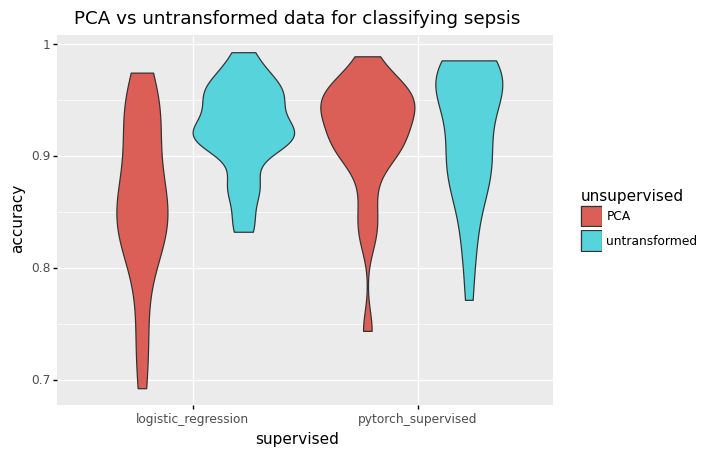

<ggplot: (8766856760004)>


In [4]:
plot = ggplot(sepsis_metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('PCA vs untransformed data for classifying sepsis')
print(plot)

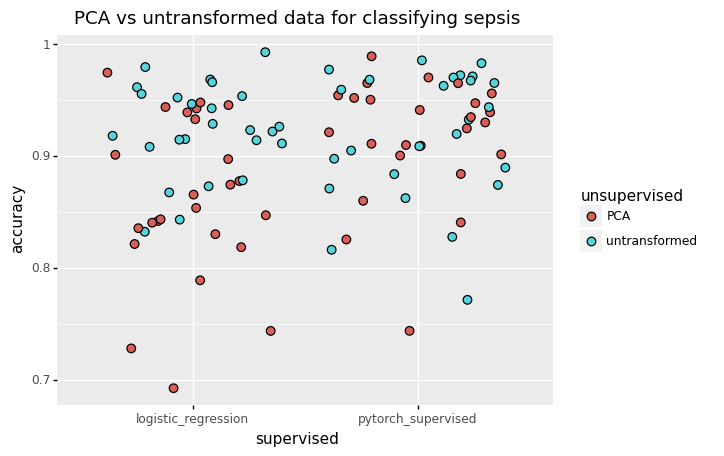

<ggplot: (8766856760040)>


In [5]:
plot = ggplot(sepsis_metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_jitter(size=3)
plot += ggtitle('PCA vs untransformed data for classifying sepsis')
print(plot)

## All labels

In [6]:
in_files = glob.glob('../../results/all_labels.*')
print(in_files[:5])

['../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.0.tsv', '../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.4.tsv', '../../results/all_labels.pytorch_supervised.refinebio_labeled_dataset.1.tsv', '../../results/all_labels.PCA.pytorch_supervised.refinebio_labeled_dataset.4.tsv', '../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.1.tsv']


In [7]:
metrics = None
for path in in_files:
    if metrics is None:
        metrics = pd.read_csv(path, sep='\t')
        
        model_info = path.strip('.tsv').split('all_labels.')[-1]
        
        model_info = model_info.split('.')
        
        if len(model_info) == 4:
            unsupervised_model = model_info[0]
            supervised_model = model_info[1]
        else:
            unsupervised_model = 'untransformed'
            supervised_model = model_info[0]
             
        metrics['unsupervised'] = unsupervised_model
        metrics['supervised'] = supervised_model
    else:
        new_df = pd.read_csv(path, sep='\t')
        model_info = path.strip('.tsv').split('all_labels.')[-1]
        model_info = model_info.split('.')
        
        if len(model_info) == 4:
            unsupervised_model = model_info[0]
            supervised_model = model_info[1]
        else:
            unsupervised_model = 'untransformed'
            supervised_model = model_info[0]
             
        new_df['unsupervised'] = unsupervised_model
        new_df['supervised'] = supervised_model
        
        metrics = pd.concat([metrics, new_df])

metrics

,accuracy,train studies,train sample count,unsupervised,supervised
0,0.120998,"GSE22098,GSE28750,GSE55201,GSE45291,GSE26049,G...",8391,PCA,logistic_regression
1,0.044194,"GSE22098,GSE28750,GSE55201,GSE32198,GSE72798,G...",8107,PCA,logistic_regression
2,0.010417,"GSE55201,GSE3491,GSE45291,GSE26049,GSE32198,GS...",8122,PCA,logistic_regression
3,0.002366,"GSE22098,GSE28750,GSE55201,GSE3491,GSE45291,GS...",7698,PCA,logistic_regression
4,0.012376,"GSE22098,GSE28750,GSE3491,GSE45291,GSE26049,GS...",8618,PCA,logistic_regression
...,...,...,...,...,...
0,0.002183,"GSE93272,E-MEXP-3567,GSE79150,SRP132709,GSE570...",8402,untransformed,logistic_regression
1,0.070588,"GSE42305,E-MEXP-3567,GSE61240,GSE79150,GSE9327...",8109,untransformed,logistic_regression
2,0.053706,"GSE42305,E-MEXP-3567,GSE61240,SRP132709,GSE791...",7981,untransformed,logistic_regression
3,0.017518,"GSE42305,GSE61240,SRP132709,GSE57065,GSE13015,...",8864,untransformed,logistic_regression


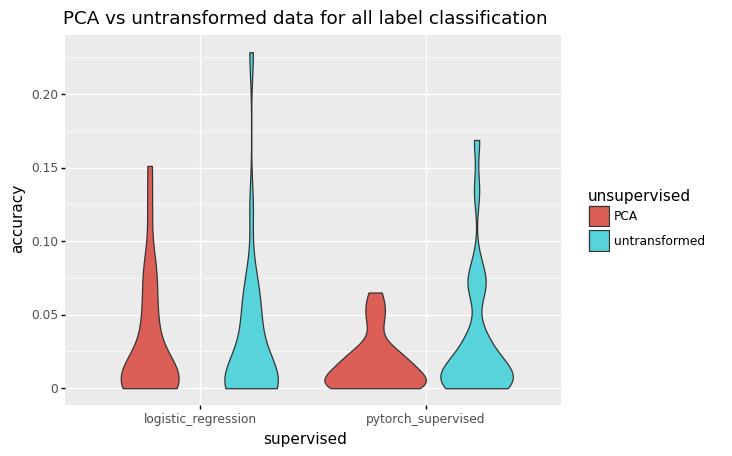

<ggplot: (8766851683461)>


In [8]:
plot = ggplot(metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('PCA vs untransformed data for all label classification')
print(plot)

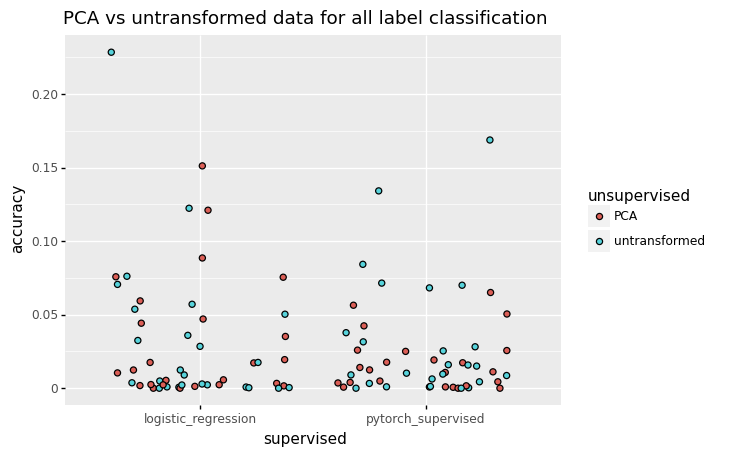

<ggplot: (8766851682292)>


In [9]:
plot = ggplot(metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_jitter(size=2)
plot += ggtitle('PCA vs untransformed data for all label classification')
print(plot)

# Subsets of healthy labels

In [10]:
in_files = glob.glob('../../results/subset_label.*')
print(in_files[:5])

['../../results/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.4.tsv', '../../results/subset_label.sepsis.logistic_regression.refinebio_labeled_dataset.3.tsv', '../../results/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.0.tsv', '../../results/subset_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.3.tsv', '../../results/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.1.tsv']


In [30]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics

,accuracy,train studies,train sample count,unsupervised,supervised
0.791209,"GSE98793,GSE65682,SRP132709,GSE33580,GSE19491,...",1386,{percent},untransformed,pytorch_supervised
0.941392,"GSE98793,GSE65682,SRP132709,GSE33580,GSE19491,...",1548,{percent},untransformed,pytorch_supervised
0.809524,"GSE98793,GSE65682,SRP132709,GSE33580,GSE19491,...",1710,{percent},untransformed,pytorch_supervised
0.923077,"GSE98793,GSE65682,SRP132709,GSE33580,GSE19491,...",1871,{percent},untransformed,pytorch_supervised
0.945055,"GSE98793,GSE65682,SRP132709,GSE33580,GSE19491,...",2033,{percent},untransformed,pytorch_supervised
...,...,...,...,...,...
0.955714,"GSE79150,GSE3491,GSE57065,GSE11909,GSE65088,E-...",1897,{percent},PCA,pytorch_supervised
0.915714,"GSE79150,GSE3491,GSE57065,GSE11909,GSE65088,E-...",2026,{percent},PCA,pytorch_supervised
0.958571,"GSE79150,GSE3491,GSE57065,GSE11909,GSE65088,E-...",2156,{percent},PCA,pytorch_supervised
0.922857,"GSE79150,GSE3491,GSE57065,GSE11909,GSE65088,E-...",2285,{percent},PCA,pytorch_supervised


In [31]:
# Temporary hack due to incorrect formatting in subset_label_prediction
sepsis_metrics = sepsis_metrics.reset_index()
rename_map = {'accuracy': 'train studies', 'train studies': 'train sample count',
              'train sample count': 'percent', 'index': 'accuracy'
             }

sepsis_metrics = sepsis_metrics.rename(rename_map, axis='columns')

percents = np.resize((np.arange(10) + 1) * .1, 1000)
sepsis_metrics['percent'] = percents

sepsis_metrics

,accuracy,train studies,train sample count,percent,unsupervised,supervised
0,0.791209,"GSE98793,GSE65682,SRP132709,GSE33580,GSE19491,...",1386,0.1,untransformed,pytorch_supervised
1,0.941392,"GSE98793,GSE65682,SRP132709,GSE33580,GSE19491,...",1548,0.2,untransformed,pytorch_supervised
2,0.809524,"GSE98793,GSE65682,SRP132709,GSE33580,GSE19491,...",1710,0.3,untransformed,pytorch_supervised
3,0.923077,"GSE98793,GSE65682,SRP132709,GSE33580,GSE19491,...",1871,0.4,untransformed,pytorch_supervised
4,0.945055,"GSE98793,GSE65682,SRP132709,GSE33580,GSE19491,...",2033,0.5,untransformed,pytorch_supervised
...,...,...,...,...,...,...
995,0.955714,"GSE79150,GSE3491,GSE57065,GSE11909,GSE65088,E-...",1897,0.6,PCA,pytorch_supervised
996,0.915714,"GSE79150,GSE3491,GSE57065,GSE11909,GSE65088,E-...",2026,0.7,PCA,pytorch_supervised
997,0.958571,"GSE79150,GSE3491,GSE57065,GSE11909,GSE65088,E-...",2156,0.8,PCA,pytorch_supervised
998,0.922857,"GSE79150,GSE3491,GSE57065,GSE11909,GSE65088,E-...",2285,0.9,PCA,pytorch_supervised


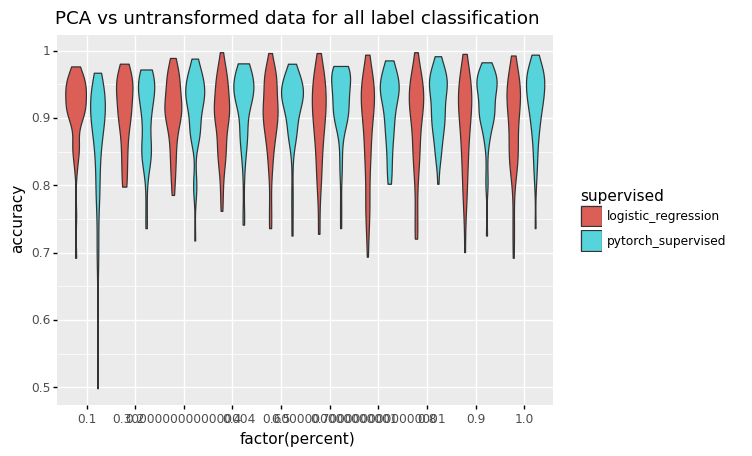

<ggplot: (8766823477776)>


In [34]:
plot = ggplot(sepsis_metrics, aes(x='factor(percent)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of sub')
print(plot)